In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})

def plot_params(core_dir,n_ranks,true_params,title,save_name):
    fig,ax = plt.subplots(1,2,figsize=(16,8))
    fig.subplots_adjust(hspace=0.35,wspace=0.35)
    if title is not None:
        fig.suptitle(title)

    for a in range(2):
      for r in range(n_ranks):
        params = np.load(core_dir+"/results_rank"+str(r)+"/parameters.npy")

        n,_,_= ax[a].hist(params[:,a],100,alpha=0.35,label=f'Rank {r}')
        ax[a].plot([true_params[a]]*2,[0.0,np.max(n)],'k--',linewidth=3.0)
            
        ax[a].grid(True)
        ax[a].set_xlabel(f'Parameter {a}')
        ax[a].legend(fontsize=15)

    plt.show()
    if save_name is not None:
        fig.savefig(save_name)

def plot_events(core_dir,n_ranks,title,save_name):
    fig,ax = plt.subplots(2,2,figsize=(16,8))
    fig.subplots_adjust(hspace=0.35,wspace=0.35)
    if title is not None:
        fig.suptitle(title)

    real_events = np.load(core_dir+"/results_rank0/real_events.npy")

    for a in range(2):
       for b in range(2):
          ax[a,b].hist(real_events[a][:,b],100,linewidth=3.0,histtype='step',color='black',label='Real')
          for r in range(n_ranks):
            gen_events = np.load(core_dir+"/results_rank"+str(r)+"/gen_events.npy")
            ax[a,b].hist(gen_events[a][:,b],100,linewidth=3.0,histtype='step',label=f'Rank {r}')

          ax[a,b].grid(True)

          xlabel = f'$x_{a}$'
          if b == 1:
             xlabel = f'$y_{a}$'
          ax[a,b].set_xlabel(xlabel)
          ax[a,b].legend(fontsize=15)

    plt.show()
    if save_name is not None:
        fig.savefig(save_name)




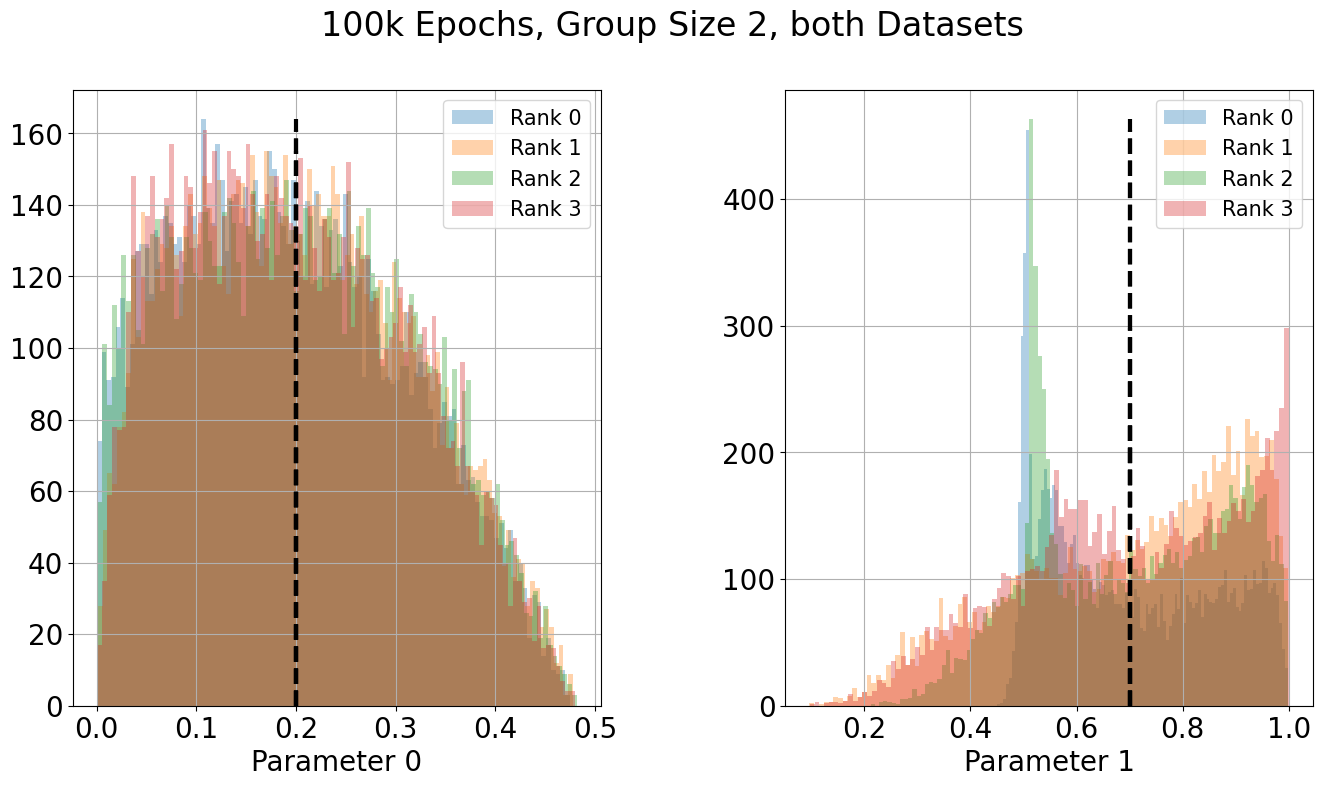

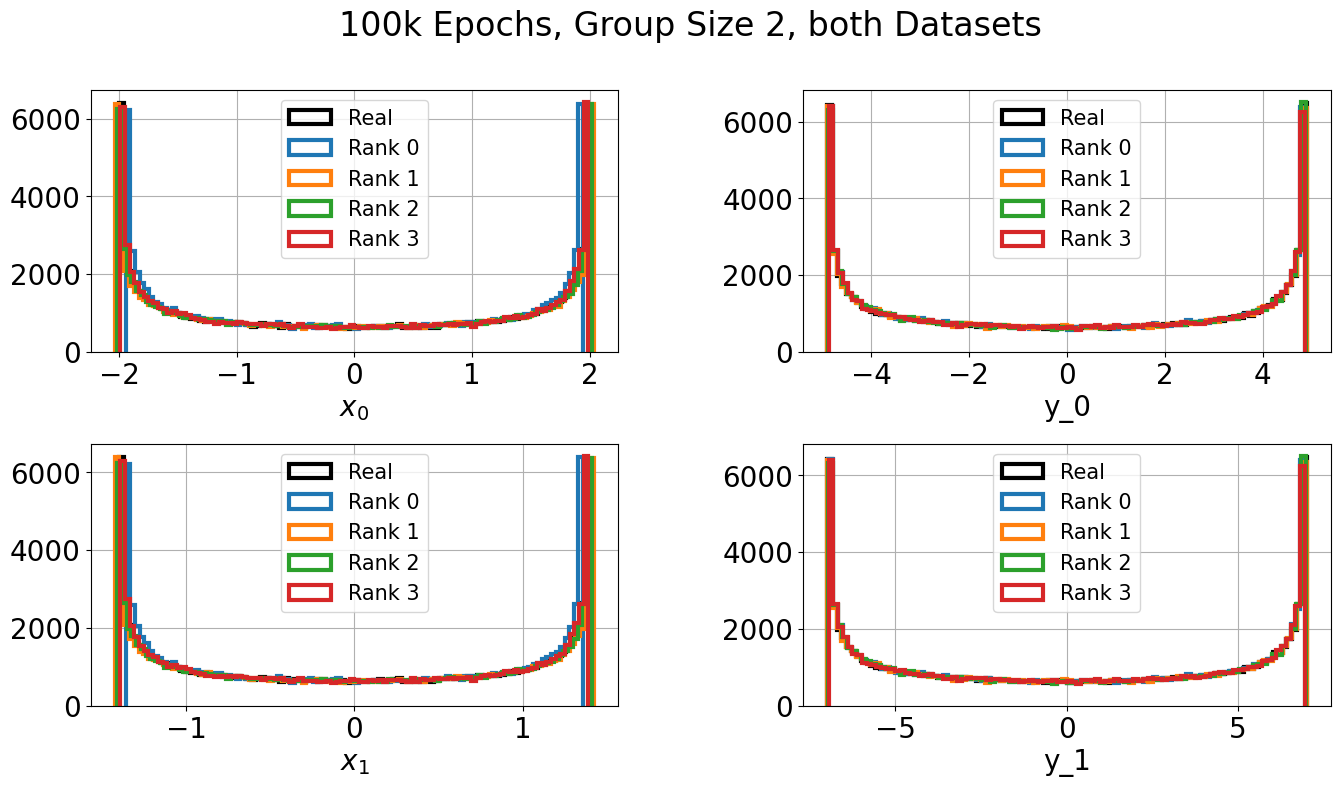

In [11]:
core_dir  = "results_ellipse_multidata_v0"
t = "100k Epochs, Group Size 2, both Datasets"
s_p = "multidata_ellipse_params_allsets.png"
s_e = "multidata_ellipse_events_allsets.png"
plot_params(core_dir,4,[0.2,0.7],t,s_p)
plot_events(core_dir,4,t,s_e)